Data from NOPIMS, see readme in data dir

In [130]:
import lasio
import matplotlib.pyplot as plt
%matplotlib inline
import os
from tqdm.auto import tqdm
import pandas as pd
import geopandas as gpd
import numpy as np
from pathlib import Path

In [140]:
data_in = Path("../../data/raw/cleo3_DST/P00687700/clio_3_dst_gauge_data/")
data_out = Path("../../data/processed/cleo3_DST/P00687700/clio_3_dst_gauge_data")

In [142]:
def read_tpr(f, header=14, widths=[10 + 12, 12, 12, 9]):
    df = pd.read_fwf(f, header=header, widths=widths)
    with f.open() as fi:
        header = "".join([fi.readline() for i in range(header)])

    return df, header


# extra parsing for this clio3 PSIA files
def parse_clio3_tpr(df):
    df["date"] = pd.to_datetime(df["Date    Hr Min Sec"])
    df_psia = df.set_index("date")[["PSIA"]]
    return df_psia

,PSIA
date,
2010-07-31 09:00:01,6170.4854
2010-07-31 09:00:02,6163.5039
2010-07-31 09:00:03,6166.8823
2010-07-31 09:00:04,6164.9160
2010-07-31 09:00:05,6157.2275
...,...
2010-07-31 09:33:01,6167.4336
2010-07-31 09:33:02,6170.2822
2010-07-31 09:33:03,6152.8989


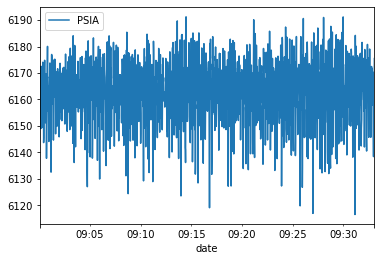

In [144]:
f = data_in / "Oculus Tailpipe Gauge 23403 Set Below Seal Assembly-head.TPR"
df, header = read_tpr(f, header=14, widths=[10 + 12, 12, 12, 9])
df_psia = parse_clio3_tpr(df)
df_psia.plot()
df_psia

,PSIA
date,
2010-07-31 09:00:01,6170.4854
2010-07-31 09:00:02,6163.5039
2010-07-31 09:00:03,6166.8823
2010-07-31 09:00:04,6164.9160
2010-07-31 09:00:05,6157.2275
...,...
2010-06-08 08:59:56,6181.5659
2010-06-08 08:59:57,6198.8545
2010-06-08 08:59:58,6206.4697


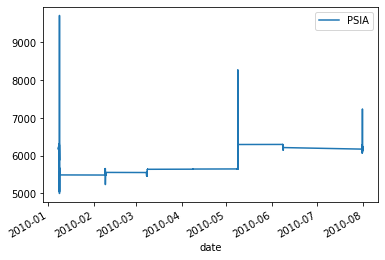

In [148]:
f = data_in / "Oculus Tailpipe Gauge 23403 Set Below Seal Assembly.TPR"
df, header = read_tpr(f, header=14, widths=[10 + 12, 12, 12, 9])
df_psia = parse_clio3_tpr(df)
df_psia.plot()
df_psia

# save as parquet

In [177]:
fo = data_out / (f.stem.replace(" ", "_") + "PSIA.parquet")
fo.parent.mkdir(parents=True, exist_ok=True)
print("save to", fo)
df_psia.to_parquet(fo, compression="gzip")

save to ../../data/processed/cleo3_DST/P00687700/clio_3_dst_gauge_data/Oculus_Tailpipe_Gauge_23403_Set_Below_Seal_AssemblyPSIA.parquet


AttributeError: 'AxesSubplot' object has no attribute 'to_parquet'

In [181]:
df_psia = pd.read_parquet(fo)

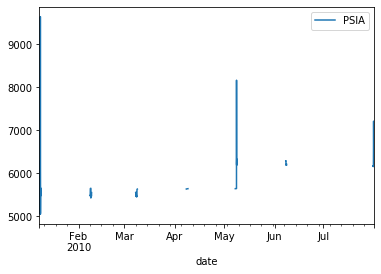

In [182]:
# lots of missing intervals
df_psia_r = df_psia.resample("1T").mean()
df_psia_r.plot()

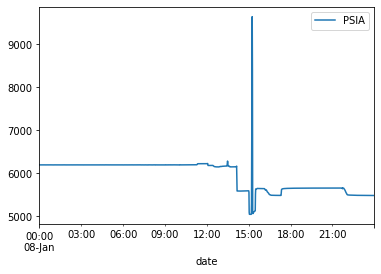

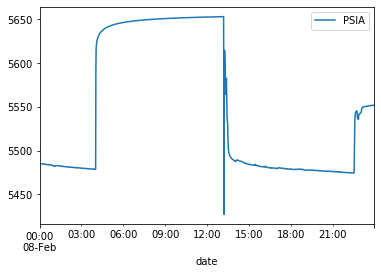

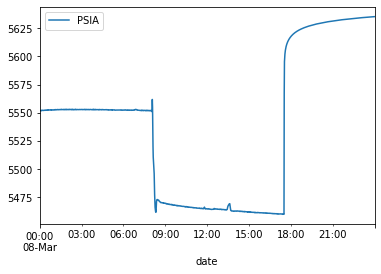

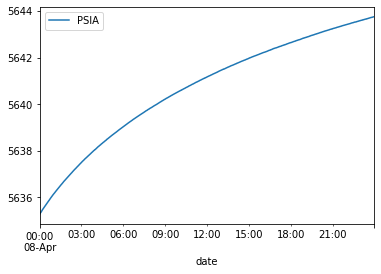

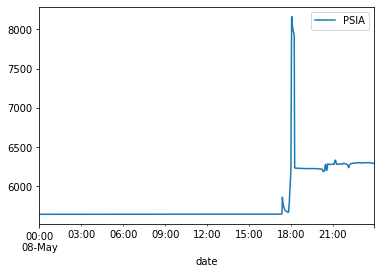

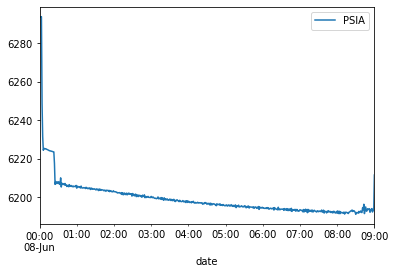

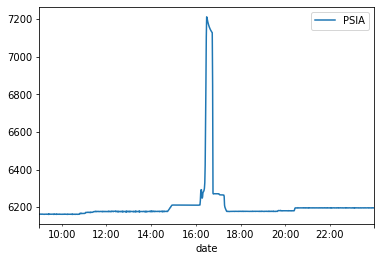

In [195]:
# show all intervals with data in
for a in pd.date_range("2009", "2011", freq="7D"):
    d = df_psia_r[a : a + pd.Timedelta("7D")]
    d = d.dropna().resample("1T").mean()
    if len(d.dropna()) > 10:
        d.plot()

In [129]:
# # Work out widths
# a='31/07/10 |09:00:03   |125.90083  |6166.8823  |128.6929'
# widths=[len(aa)+1 for aa in a.split('|')]
# widths